In [12]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

from lib.utils import get_v_from_data,mse

## Load the data

In [13]:
x0 = np.genfromtxt('data/linear_vectorfield_data_x0.txt', dtype="double")
x1 = np.genfromtxt('data/linear_vectorfield_data_x1.txt', dtype="double")

## Visualize the data

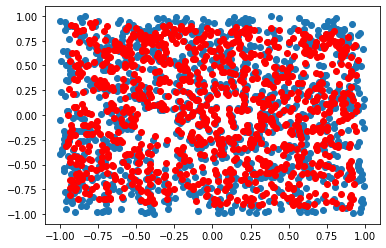

In [14]:
xT0 = x0.T
xT1 = x1.T
plt.scatter(xT0[0],xT0[1])
plt.scatter(xT1[0],xT1[1],color='r')
plt.show()

### Part 1

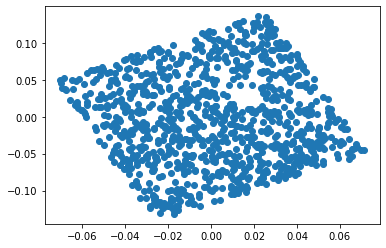

In [15]:
v = get_v_from_data(x0, x1, 1)
vT = v.T 
plt.scatter(vT[0], vT[1])
plt.show()

### Calculate A

In [16]:
A,residuals,rank,s = LA.lstsq(x0,v,None)
print(A)
X_new = np.zeros(x0.shape)
for i in range(len(x0[0])):
    X_new[i] = (A@x0[i])
print(X_new.shape)

### Visualize the approximated vector field

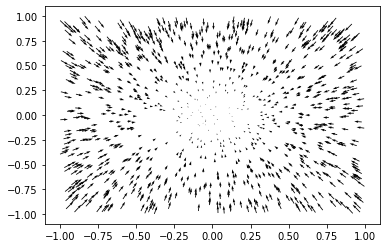

In [17]:
fig = plt.figure()
ax = plt.axes()

X,Y = zip(*x0)

v = get_v_from_data(x0,X_new, 1)
V_X,V_Y = zip(*v)


color = np.arange(len(X))
ax.quiver(X,Y,V_X,V_Y)

### Part 2: Calculate the Mean squared error

In [18]:
x1_estimate = X_new*0.1 + x0
ms = mse(x1_estimate,x1)
print("mean squared error of the estimation =", ms)

mean squared error of the estimation = 0.0048776537886845205


### Part 3: Visualize the path of point (10,10)

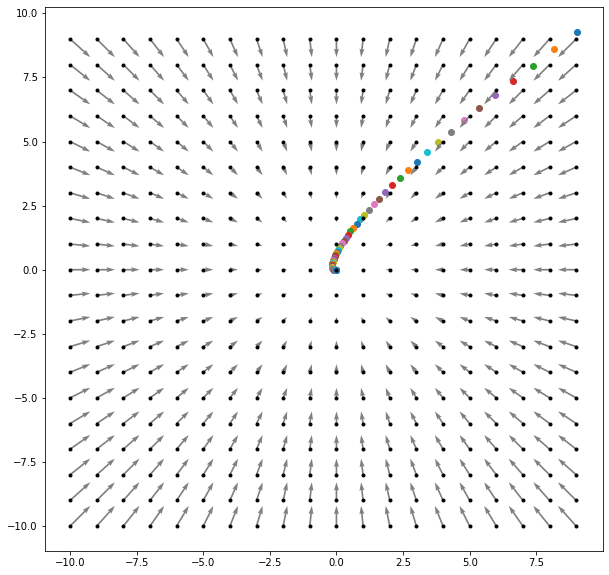

In [19]:
initial_pos = [10, 10]

tt = np.linspace(1, 100, 100)

fig = plt.figure(figsize=(10,10))

x1_update = np.array([])

for i in range(101):
    v = A@initial_pos
    x1_estimate = v + initial_pos
    initial_pos = x1_estimate
    plt.scatter(x1_estimate[0], x1_estimate[1])
    np.append(x1_update, x1_estimate)
    
xp = np.arange(-10, 10, 1)
yp = np.arange(-10, 10, 1)
xx, yy = np.meshgrid(xp, yp)

plt.plot(xx, yy, marker='.', color='k', linestyle='none')

vector = A@initial_pos

direction_x = -xx + vector[0]
direction_y = -yy + vector[1]

plt.quiver(xx, yy, direction_x, direction_y, color='grey')
plt.show()